In [1]:
import numpy as np
import sys
import os, sys
import matplotlib.pyplot as plt
import xarray as xr
#from xarray import open_mfadataset
import cartopy.crs as crs
import cartopy
from matplotlib.colors import LogNorm
import numpy as np
import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature
import cmocean
import matplotlib
#from pathlib import Path4
#edit 12/04
from pathlib import Path
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import pyplot as plt
import rasterio
from rasterio.plot import show
#try adding
#import cfunits
from pyschism.mesh import Hgrid
import pyschism
from matplotlib.image import imread
import cmcrameri.cm as ccm
from matplotlib.collections import PolyCollection

print("Modules imported!")


ERROR 1: PROJ: proj_create_from_database: Open of /global/home/users/jennaisrael/.conda/envs/geoplot/share/proj failed
/global/home/users/jennaisrael/.local/lib/python3.11/site-packages/pyschism/forcing/hycom/gofs.py:8: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater as sw
/global/home/users/jennaisrael/.conda/envs/geoplot/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Modules imported!


In [2]:
#import Sienna's plotting library
import schism_plot_lib_12_04 as spl
import time

In [3]:
#Plot the salinity difference for 08/23/2014
#what time step does that correspond to?
#146 days after 03/30

In [4]:
#Repeat this for the study with 2 C warming, NEED TO MAKE THE DATE YOU COMPARE THE SAME 

In [5]:
fn = "/global/scratch/users/jennaisrael/run_schism/run_26/outputs/"
run = spl.SchismOutput(output_folder=fn)


 Creating run object for results in /global/scratch/users/jennaisrael/run_schism/run_26/outputs/ ... 

Found 3331 netcdf files!
Found output for:
	 1 - horizontalVelX
	 2 - horizontalVelY
	 3 - hotstart
	 4 - out2d
	 5 - salinity
	 6 - temperature
	 7 - zCoordinates


In [6]:
ds = run.Result(run, variable = "salinity", filenumber=136)

/global/scratch/users/jennaisrael/run_schism/run_26/outputs/salinity_136.nc
Loading in /global/scratch/users/jennaisrael/run_schism/run_26/outputs/salinity_136.nc
Loaded in dataset! 

<xarray.Dataset> Size: 1GB
Dimensions:   (time: 48, nSCHISM_hgrid_node: 305834, nSCHISM_vgrid_layers: 23)
Coordinates:
  * time      (time) float64 384B 1.167e+07 1.167e+07 ... 1.175e+07 1.175e+07
Dimensions without coordinates: nSCHISM_hgrid_node, nSCHISM_vgrid_layers
Data variables:
    salinity  (time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers) float32 1GB ...
TIME [11665800. 11667600. 11669400. 11671200. 11673000. 11674800. 11676600.
 11678400. 11680200. 11682000. 11683800. 11685600. 11687400. 11689200.
 11691000. 11692800. 11694600. 11696400. 11698200. 11700000. 11701800.
 11703600. 11705400. 11707200. 11709000. 11710800. 11712600. 11714400.
 11716200. 11718000. 11719800. 11721600. 11723400. 11725200. 11727000.
 11728800. 11730600. 11732400. 11734200. 11736000. 11737800. 11739600.
 11741400. 11743200.

In [7]:
#1.262e+07 seconds = 146 days

In [8]:
run.run_dir

PosixPath('/global/scratch/users/jennaisrael/run_schism/run_26')

In [9]:
run.run_dir / "hgrid.gr3"

PosixPath('/global/scratch/users/jennaisrael/run_schism/run_26/hgrid.gr3')

In [10]:
proj_utm10 = 'EPSG:26910'

In [11]:
hgrid = Hgrid.open('/global/scratch/users/jennaisrael/run_schism/run_26/hgrid_clean.gr3', crs=proj_utm10)

Taking temporal average ... 
[11665800. 11667600. 11669400. 11671200. 11673000. 11674800. 11676600.
 11678400. 11680200. 11682000. 11683800. 11685600. 11687400. 11689200.
 11691000. 11692800. 11694600. 11696400. 11698200. 11700000. 11701800.
 11703600. 11705400. 11707200. 11709000. 11710800. 11712600. 11714400.
 11716200. 11718000. 11719800. 11721600. 11723400. 11725200. 11727000.
 11728800. 11730600. 11732400. 11734200. 11736000. 11737800. 11739600.
 11741400. 11743200. 11745000. 11746800. 11748600. 11750400.]
Model is at time = time-averaged from Jan 01 1970 00:00 to Jan 01 1970 00:00
Taking depth average ... 
Loaded in hgrid.gr3 file...

Domain = Bay-Delta
Domain options: SSC, Delta, South_Delta, Bay_Delta
/global/scratch/users/jennaisrael/Plotting/AGU_24_plots


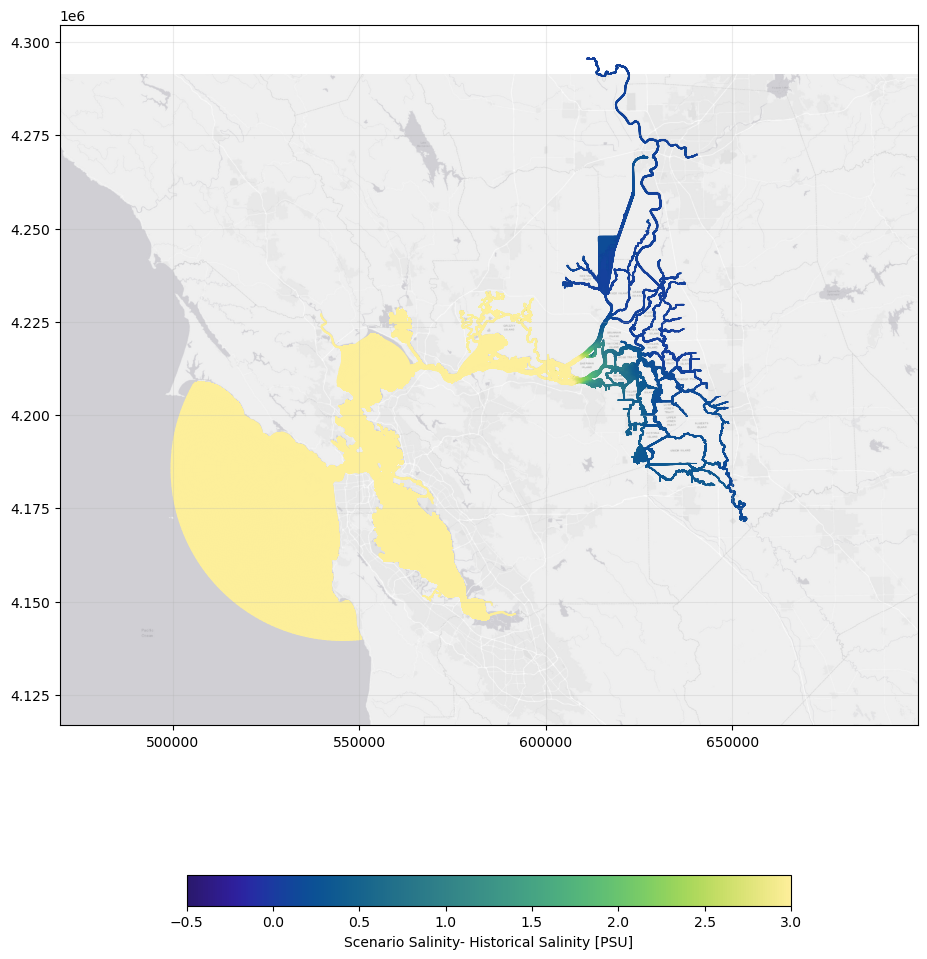

In [12]:
fig1, ax1 = ds.plot_variable(run, domain="Bay-Delta", time="average",depth= "average",titlestr="Historical Salinity 08/23/2014")

#turns out this run only goes to 137, but seems to be an issue with 137 so try 136

In [13]:
#subtract the historical from the 2C warming
fn2 = "/global/scratch/users/jennaisrael/run_schism/run_28/outputs/"
run2 = spl.SchismOutput(output_folder=fn2)
dtemp2 = run2.Result(run2, variable = "salinity", filenumber=136)


 Creating run object for results in /global/scratch/users/jennaisrael/run_schism/run_28/outputs/ ... 

Found 4953 netcdf files!
Found output for:
	 1 - horizontalVelX
	 2 - horizontalVelY
	 3 - hotstart
	 4 - out2d
	 5 - salinity
	 6 - temperature
	 7 - zCoordinates
/global/scratch/users/jennaisrael/run_schism/run_28/outputs/salinity_136.nc
Loading in /global/scratch/users/jennaisrael/run_schism/run_28/outputs/salinity_136.nc
Loaded in dataset! 

<xarray.Dataset> Size: 1GB
Dimensions:   (time: 48, nSCHISM_hgrid_node: 305834, nSCHISM_vgrid_layers: 23)
Coordinates:
  * time      (time) float64 384B 1.167e+07 1.167e+07 ... 1.175e+07 1.175e+07
Dimensions without coordinates: nSCHISM_hgrid_node, nSCHISM_vgrid_layers
Data variables:
    salinity  (time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers) float32 1GB ...
TIME [11665800. 11667600. 11669400. 11671200. 11673000. 11674800. 11676600.
 11678400. 11680200. 11682000. 11683800. 11685600. 11687400. 11689200.
 11691000. 11692800. 11694600. 11696

In [14]:
dtemp2.dataset

<xarray.Dataset> Size: 1GB
Dimensions:   (time: 48, nSCHISM_hgrid_node: 305834, nSCHISM_vgrid_layers: 23)
Coordinates:
  * time      (time) float64 384B 1.167e+07 1.167e+07 ... 1.175e+07 1.175e+07
Dimensions without coordinates: nSCHISM_hgrid_node, nSCHISM_vgrid_layers
Data variables:
    salinity  (time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers) float32 1GB ...

In [15]:
sal1_diff=dtemp2.dataset-ds.dataset


In [16]:
sal1_diff

<xarray.Dataset> Size: 1GB
Dimensions:   (time: 48, nSCHISM_hgrid_node: 305834, nSCHISM_vgrid_layers: 23)
Coordinates:
  * time      (time) float64 384B 1.167e+07 1.167e+07 ... 1.175e+07 1.175e+07
Dimensions without coordinates: nSCHISM_hgrid_node, nSCHISM_vgrid_layers
Data variables:
    salinity  (time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers) float32 1GB na...

In [17]:
dtemp2.dataset=sal1_diff

In [18]:
print(sal1_diff.max())
print(sal1_diff.min())

<xarray.Dataset> Size: 4B
Dimensions:   ()
Data variables:
    salinity  float32 4B 6.333
<xarray.Dataset> Size: 4B
Dimensions:   ()
Data variables:
    salinity  float32 4B -5.698


Taking temporal average ... 
[11665800. 11667600. 11669400. 11671200. 11673000. 11674800. 11676600.
 11678400. 11680200. 11682000. 11683800. 11685600. 11687400. 11689200.
 11691000. 11692800. 11694600. 11696400. 11698200. 11700000. 11701800.
 11703600. 11705400. 11707200. 11709000. 11710800. 11712600. 11714400.
 11716200. 11718000. 11719800. 11721600. 11723400. 11725200. 11727000.
 11728800. 11730600. 11732400. 11734200. 11736000. 11737800. 11739600.
 11741400. 11743200. 11745000. 11746800. 11748600. 11750400.]
Model is at time = time-averaged from Jan 01 1970 00:00 to Jan 01 1970 00:00
Taking depth average ... 
Domain = Delta
/global/scratch/users/jennaisrael/Plotting/AGU_24_plots


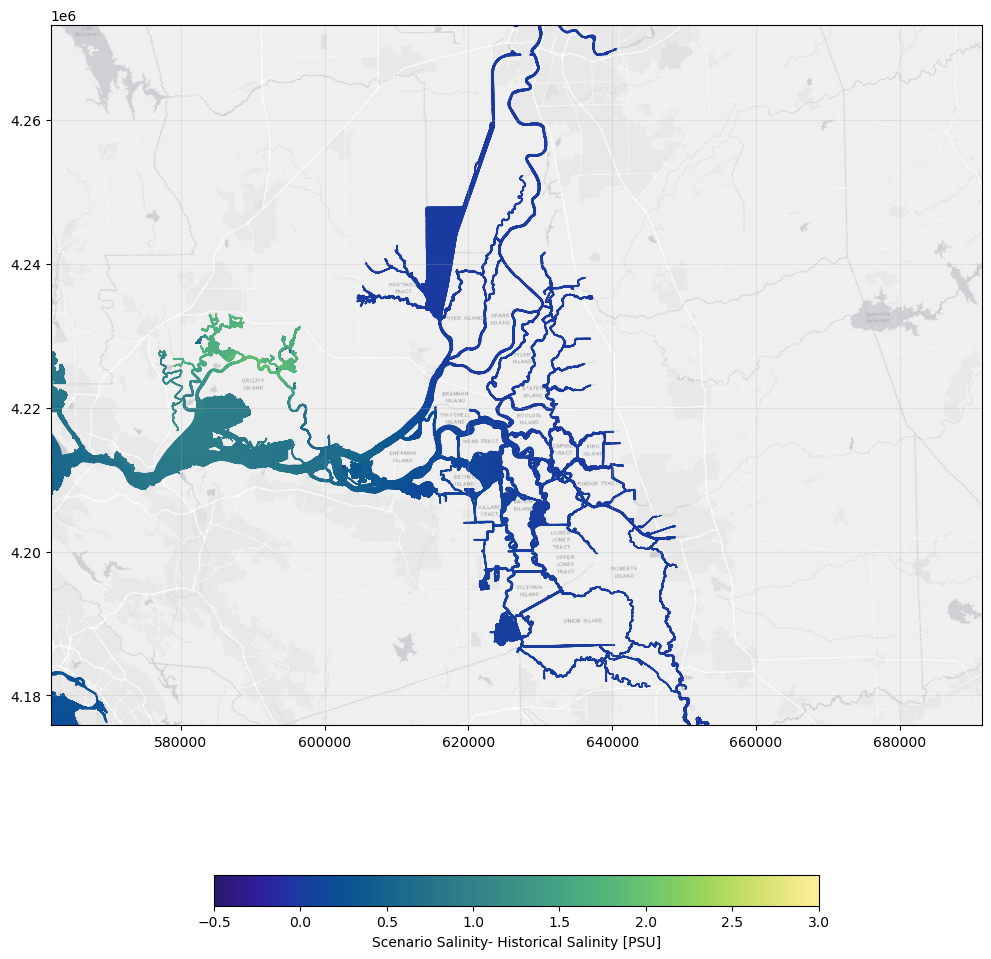

In [19]:
fig2, ax2 = dtemp2.plot_variable(run, domain="Delta", time="average",depth= "average",titlestr="0.8 m RLSR - Histoical Salinity 08/23/2014")

In [20]:
# values[schism_output.hgrid.quads]

In [21]:
#ax2.climits[]

In [22]:
# #subtract the historical from the SLR on the same day
# fn3 = "/global/scratch/users/jennaisrael/run_schism/run_27/outputs/"
# run3 = spl.SchismOutput(output_folder=fn3)
# dslr2 = run3.Result(run3, variable = "salinity", filenumber=147)

In [23]:
# sal2_diff=dslr2.dataset-ds.dataset
# dslr2.dataset=sal2_diff

In [24]:
# print(sal2_diff.max())
# print(sal2_diff.min())

In [25]:
# fig3, ax3 = dslr2.plot_variable(run, domain="Delta", time="average",depth= "average",titlestr="1.2 m RLSR - Histoical Salinity 08/23/2014")

In [26]:
#export figures 2 and 3
#fig2.savefig('salinity_temp2C.png')
#fig3.savefig('salinity_SLR2.png')